# <u><b> Objective </b></u>
## <b> Your task is to predict whether a message will be spam or not. You are required to use TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_learning/Naive_Bayes/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['length']= df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

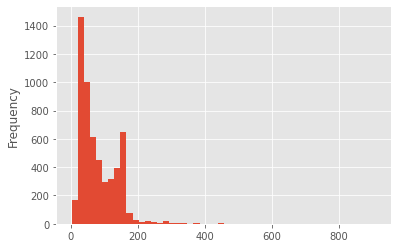

In [7]:
df['length'].plot(bins=50,kind='hist')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.groupby('label').describe()

**Text Pre-processing:**

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import string
from nltk.corpus import stopwords

In [10]:
stpwrds= stopwords.words('english')

Remove punctucations

In [11]:
punc_words= [punc for punc in string.punctuation]

In [12]:
def text_process(msg):
  a= ''.join([w for w in msg if w not in punc_words])
  a= ' '.join([w for w in a.split() if w.lower() not in stpwrds])
  return a

In [13]:
df['mod_msg']= df['message'].apply(lambda x: text_process(x)) 

In [ ]:
df.head()

,label,message,length,mod_msg
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['mod_msg'])

In [17]:
vectorizer.get_feature_names_out()

array(['008704050406', '0089my', '0121', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [18]:
X.shape

(5572, 9376)

In [19]:
df.shape

(5572, 4)

In [21]:
X.toarray()[2]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.toarray(),df['label'],test_size=0.2)

In [23]:
from sklearn.naive_bayes import GaussianNB
sdetect_model = GaussianNB().fit(X_train,y_train)

In [24]:
train_preds = sdetect_model.predict(X_train)
test_preds = sdetect_model.predict(X_test)

Evaluation of the Model 

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
# Confusion matrices for train and test 

print('Train set\n', confusion_matrix(y_train,train_preds))
print('Test Set\n', confusion_matrix(y_test,test_preds))

Train set
 [[3636  236]
 [   0  585]]
Test Set
 [[849 104]
 [ 23 139]]


In [27]:
print('Trainset Report\n', classification_report(y_train,train_preds))
print("\n")
print('Testset Report\n', classification_report(y_test,test_preds))

Trainset Report
               precision    recall  f1-score   support

         ham       1.00      0.94      0.97      3872
        spam       0.71      1.00      0.83       585

    accuracy                           0.95      4457
   macro avg       0.86      0.97      0.90      4457
weighted avg       0.96      0.95      0.95      4457



Testset Report
               precision    recall  f1-score   support

         ham       0.97      0.89      0.93       953
        spam       0.57      0.86      0.69       162

    accuracy                           0.89      1115
   macro avg       0.77      0.87      0.81      1115
weighted avg       0.92      0.89      0.89      1115

